
## два ускоряющихся заряда — синхронное ускорение

### Пусть:
- Заряд 1 и заряд 2 ускоряются **синхронно**:  
  $\vec{a}_1(t) = \vec{a}_2(t)$,  
  $\vec{v}_1(t) = \vec{v}_2(t)$,  
  но в разных местах.

📌 Это — **аналог ситуации самодействия**, но для двух тел.

### Вопрос:
> Можно ли применить поле Лиенара–Вихерта?

✅ Да, но:
- Поле заряда 1 в точке заряда 2 — $\vec{E}_{\text{LV},1}(\vec{r}_2, t)$,
- Сила: $\vec{F}_2 = \int \rho_2(\vec{r}_2) \vec{E}_{\text{LV},1}(\vec{r}_2, t) \, d^3r_2$,
- Но **интегрирование** — по **сечению, ортогональному 4-скорости заряда 2**.

📌 Это — **вариация В для каждого заряда**.

---

### Геометрия:
- Мировые трубки обоих зарядов — **параллельные гиперболы**,
- Сечения $\Sigma_\perp$ — **ортогональны** обеим,
- Область интегрирования — **цилиндры** вдоль их мировых линий.

✅ Принцип Гамильтона:
$$
\delta S = \delta \int_{G_1} j_1^\mu A_{\mu,2} \, d^4x + \delta \int_{G_2} j_2^\mu A_{\mu,1} \, d^4x
$$

- Каждое интегрирование — по **своему $\Sigma_\perp$**,
- Вариация $\delta x^\mu$ — вдоль $\Sigma_\perp$ каждого заряда.

---

## 🔍 Часть 4: ускорения различаются

### Теперь $\vec{a}_1 \ne \vec{a}_2$

Тогда:
- Мировые линии — **не параллельны**,
- Сечения $\Sigma_{\perp,1}$ и $\Sigma_{\perp,2}$ — **не совпадают**,
- Геометрия — **не симметричная**.

### Как применить принцип Гамильтона?

1. ✅ Для **каждого заряда** — своя мировая трубка $T_1, T_2$,
2. ✅ Для каждого — своё сечение $\Sigma_{\perp,1}(\tau_1), \Sigma_{\perp,2}(\tau_2)$,
3. ✅ Действие:
   $$
   S = \int_{T_1} j_1^\mu A_{\mu,2} \, d^4x + \int_{T_2} j_2^\mu A_{\mu,1} \, d^4x
   $$
   где:
   - Первый интеграл — по $T_1$, с мерой $d\tau_1 dV_{\perp,1}$,
   - Второй — по $T_2$, с мерой $d\tau_2 dV_{\perp,2}$,
4. ✅ Вариация: $\delta x_1^\mu$ — вдоль $\Sigma_{\perp,1}$,  
   $\delta x_2^\mu$ — вдоль $\Sigma_{\perp,2}$.

📌 Это — **обобщение вариации В на систему с разной кинематикой**.

---


## Мировые линии центров зарядов:

$$
x_1(t) = \frac{1}{2} a_1 t^2, \quad x_2(t) = d + \frac{1}{2} a_2 t^2
$$

Мировые трубки — это области вокруг этих линий, с фиксированной шириной (в сопутствующей системе).


In [1]:
# accelerations
var("a_1, a_2")
assume(a_1, "real")
assume(a_2, "real")

# half-length of the charges
var("l")
assume(l, "real")

# distance between centers of the charges
var("d")
assume(d, "real")

# time duration of the tube starting from time when velocity of charge is zero
var("t_1, t_2")
assume(t_1, "real")
assume(t_2, "real")

# time duration of the tube starting from time when velocity of charge is zero
var("t_1r, t_2l")
assume(t_1r, "real")
assume(t_2l, "real")

# time when velocity of charge is zero
var("t1_0, t2_0")
assume(t1_0, "real")
assume(t2_0, "real")

assume(x, "real")

# уравнения мировых трубок двух зарядов в нерелятивистском приближении
t1   = t1_0 + sqrt(2*x/a_1)
t1_l = t1_0 + sqrt(2*(x+l)/a_1)
t1_r = t1_0 + sqrt(2*(x-l)/a_1)

t2   = t2_0 + sqrt(2*(x-d)/a_2)
t2_l = t2_0 + sqrt(2*(x+l-d)/a_2)
t2_r = t2_0 + sqrt(2*(x-l-d)/a_2)

Найдём уравнение перпендикуляра к мировой линии центра заряда

Угловой коэффициент (наклон) мировой линии.

$$dx_1/dt = a_1 \cdot t_1$$

Если угловой коэффициент мировой линии равен $k = (dt/dx) = \frac{1}{\left(a_1 \cdot t_1\right)}$,

In [2]:
show(t1.diff(x).expand())

1/2*sqrt(2)/(a_1*sqrt(x/a_1))

то угловой коэффициент перпендикулярной прямой равен
 
$$m = -1/k = (dt/dx) = -\left(a_1 \cdot t_1\right).$$
 
 
Используя формулу уравнения прямой вида $t_1 =  m x + b$

$$t_1 = -\left(a_1 \cdot t_1\right) x + b$$,

подставляем точку проведения перпендикуляра отрезка и новый угловой коэффициент, чтобы найти b. 

$$t_1 = -\left(a_1 \cdot t_1\right) \frac{1}{2} a_1 t_1^2 + b$$
 
$$b = t_1  + \frac{a_1^2}{2}  t_1^3$$

In [3]:
def tubes_plot_simple(A1, A2, L, D, T1, T2, tune_T1, T1_start = 0.0, T2_start = 0.0, mode='simple', logging=True):
    """
    mode: 
        'simple'  -> перпендикуляры к центральной линии
    """

    # displacement of charge 1 center
    # перемещение центра каждого из зарядов исходя из ускорения и времени
    S1 = a_1*(t_1-t1_0)^2/2
    S2 = a_2*(t_2-t2_0)^2/2

    values     = [a_1 == A1, a_2 == A2, d == D, l == L, t1_0 == T1_start, t2_0 == T2_start]

    # Центральные точки
    x_1 = S1
    x_2 = d + S2

    # угловой коэффициент прямой перпендикулярной центральной мировой линии 
    # в точке, соответствующей вычисленной выше перемещению равен
    # $ m = -1/k = (dt/dx) = -\left(a_1 \cdot t_1\right)$.
    m1 = -a_1*(t_1-t1_0)
    m2 = -a_2*(t_2-t2_0)

    if logging:
        print("m1 =", m1); show(m1)
        print("m2 =", m2); show(m2)

    # Используйте формулу уравнения прямой вида
    # $t_1 = -\left(a_1 \cdot t_1\right) x + b$,
    # подставив точку проведения перпендикуляра отрезка
    # и новый угловой коэффициент, чтобы найти b.
    b1 = (t_1-t1_0) - m1 * x_1
    b2 = (t_2-t2_0) - m2 * x_2

    # уравнения прямой перпендикулярной центральной мировой линии каждого из зарядов
    perp_1 = m1*x + b1
    perp_2 = m2*x + b2

    if logging:
        print("perp_1 =", perp_1); show(perp_1)
        print("perp_2 =", perp_2); show(perp_2)

    # x координата точки пересечения перпендикуляра к центральной мировой линии
    # с левой и правой границей мировой трубки
    # для каждого из зарядов


    if mode == 'simple':
        # Найдём пересечения перпендикуляров к центру с границами

        x_1_l = solve ((t1_l^2 == perp_1^2), [x])[0].rhs()
        x_1_r = solve ((t1_r^2 == perp_1^2), [x])[0].rhs()

        x_2_l = solve ((t2_l^2 == perp_2^2), [x])[0].rhs()
        x_2_r = solve ((t2_r^2 == perp_2^2), [x])[0].rhs()

        if logging:
            print("x_1_r =", x_1_r); show(x_1_r)
            print("x_2_l =", x_2_l); show(x_2_l)
        
        # t координата точки пересечения перпендикуляра к центральной мировой линии
        # с левой и правой границей мировой трубки
        # для каждого из зарядов

        # t координаты точек пересечения
        t_1_l = t1_l.subs(x == x_1_l)#.subs(values)
        t_1_r = t1_r.subs(x == x_1_r)#.subs(values)

        t_2_l = t2_l.subs(x == x_2_l)#.subs(values)
        t_2_r = t2_r.subs(x == x_2_r)#.subs(values)

        if logging:
            print("t_1_r =", t_1_r); show(t_1_r)
            print("t_2_l =", t_2_l); show(t_2_l)

    # if mode == 'line_between':
        # Построим прямой отрезок между этими двумя точками
        # t_between(x) = m_between * x + c0_between
        # t_1_r == m_between * x + x_1_r
        # t_2_l == m_between * x + x_2_l
        m_between  = (t_2 - t_1) / (x_2 - x_1)
        c0_between = t_1 - m_between * x_1
        c0_between = t_2 - m_between * x_2
        
        if logging:
            print("m_between =", m_between); show(m_between)
            print("c0_between =", c0_between); show(c0_between)
            
        optimisation_eq = m1 - m_between == m_between - m2
        if logging:
            print("optimisation_eq =", optimisation_eq); show(optimisation_eq)

        optimisation_eq = optimisation_eq.subs(values)

        t1_sol = solve(optimisation_eq, t_1)
        t2_sol = solve(optimisation_eq, t_2)

        for t1_sol_i in t1_sol:
            t1_sol_d = t1_sol_i.rhs().subs(t_2 == T2)
            print("t1_sol_d i =", t1_sol_d);
    
        for t2_sol_i in t2_sol:
            t2_sol_d = t2_sol_i.rhs().subs(t_1 == T1)
            print("t2_sol_d i =", t2_sol_d);

        if logging:
            print("optimisation_eq =", optimisation_eq); show(optimisation_eq)
        
        if tune_T1:
            values_t12 = [t_1 == t1_sol_d, t_2 == T2]
        else:
            values_t12 = [t_1 == T1, t_2 == t2_sol_d]

#         if logging:
#             print("t1_sol =", t1_sol); show(t1_sol)
#             print("t2_sol =", t2_sol); show(t2_sol)

#         if logging:
#             print("t1_sol_d =", t1_sol_d);
#             print("t2_sol_d =", t2_sol_d);
            
        # методом наименьших квадратов нужно минимизировать функционал отличия
        # между коэффициентами наклона торцов миировых трубок и соединяющей их линии
        
#         Functional = (m_between - m1)^2 + (m2 - m_between)^2
#         if logging:
#             print("Functional =", Functional)
#             print("")
            
#         # минимизация по параметру t_1
#         dFdt_1 = Functional.diff(t_1)
#         # минимизация по параметру t_2
#         dFdt_2 = Functional.diff(t_2)
#         if logging:
#             print("dFdt_1 =", dFdt_1)
#             print("")
#             print("dFdt_2 =", dFdt_2)
#             print("")
        
#         Functional_d = Functional.subs(values)
#         if logging:
#             print("Functional_d =", Functional_d); show(Functional_d)
#             print("")
        
#         # минимизация по параметру t_1
#         dFdt_1 = dFdt_1.subs(values)
#         # минимизация по параметру t_2
#         dFdt_2 = dFdt_2.subs(values)
#         if logging:
#             print("dFdt_1 =", dFdt_1); show(dFdt_1)
#             print("")
#             print("dFdt_2 =", dFdt_2); show(dFdt_2)
#             print("")

        x_1_l = x_1_l.subs(values).subs(values_t12)
        x_1_r = x_1_r.subs(values).subs(values_t12)

        x_2_l = x_2_l.subs(values).subs(values_t12)
        x_2_r = x_2_r.subs(values).subs(values_t12)

        if logging:
            print("x_1_r =", x_1_r); show(x_1_r)
            print("x_2_l =", x_1_l); show(x_2_l)

        perp_1 = perp_1.subs(values).subs(values_t12)
        perp_2 = perp_2.subs(values).subs(values_t12)

        if logging:
            print("perp_1 =", perp_1); show(perp_1)
            print("perp_2 =", perp_2); show(perp_2)
            
        x_1 = x_1.subs(values).subs(values_t12)
        x_2 = x_2.subs(values).subs(values_t12)

        S1 = S1.subs(values).subs(values_t12)
        S2 = S2.subs(values).subs(values_t12)

    plt = Graphics()


    if mode == 'simple':
        plt_perp_1   = plot((perp_1, -perp_1),   x, x_1_l, x_1_r, color="red")
        plt_perp_2   = plot((perp_2, -perp_2),   x, x_2_l, x_2_r, color="red")

        plt += plt_perp_1
        plt += plt_perp_2

        # t координаты точек пересечения
        t_1_l = t_1_l.subs(values).subs(values_t12)
        t_1_r = t_1_r.subs(values).subs(values_t12)

        t_2_l = t_2_l.subs(values).subs(values_t12)
        t_2_r = t_2_r.subs(values).subs(values_t12)

        if logging:
            print("t_1_r =", t_1_r); show(t_1_r)
            print("t_2_l =", t_2_l); show(t_2_l)

        m_between = m_between.subs(values).subs(values_t12)
        c0_between = c0_between.subs(values).subs(values_t12)
        if logging:
            print("m_between =", m_between); show(m_between)
            print("c0_between =", c0_between); show(c0_between)

    # if mode == 'line_between':
        # Построим прямой отрезок между этими двумя точками
        t_between(x) = m_between * x + c0_between

        plt += plot( t_between, x, x_1_l, x_2_r, color='orange', thickness=2)
        plt += plot(-t_between, x, x_1_l, x_2_r, color='orange', thickness=2)

#     if mode == 'exponential_between':
#         # Построим экспоненту между этими двумя точками
#         if t_1_r > 0 and t_2_l > 0:
#             # Убедимся, что xR_exp1 < xL_exp2 — иначе меняем местами
#             if x_1_r >= x_2_l:
#                 print("Warning: xR_exp1 >= xL_exp2. Swapping points.")
#                 x_1_r, x_2_l = x_2_l, x_1_r
#                 t_1_r, t_2_l = t_2_l, t_1_r
#             k = -(1/(x_1_r - x_2_l)) * ln(t_1_r / t_2_l)  # теперь k > 0, если tR1 > tL2
#             C = t_1_r * exp(k * x_1_r) # чтобы проходила через (xL2, tL2)

#             t_between(x) = C * exp(-k * x)

#             plt += plot( t_between, x, x_1_r, x_2_l, color='orange', thickness=2)
#             plt += plot(-t_between, x, x_1_r, x_2_l, color='orange', thickness=2)
#         else:
#             print("Warning: tR1 or tL2 is not positive. Skipping exponential between.")

    # пределы отрисовки мировых линий
    if mode == 'simple':
        _x_1_l = x_1_l
        _x_1_r = x_1_r
        _x_2_l = x_2_l
        _x_2_r = x_2_r

    # отрисовка мировых трубок
    plt_tube_1 = (
        plot(((t1_0 + t1  ).subs(values),  (t1_0 -t1  ).subs(values)), x, 0,   S1, color="red") +
        plot(((t1_0 + t1_l).subs(values),  (t1_0 -t1_l).subs(values)), x, 0-L, _x_1_l, color="green") +
        plot(((t1_0 + t1_r).subs(values),  (t1_0 -t1_r).subs(values)), x, 0+L, _x_1_r, color="blue")
    )

    plt_tube_2 = (
        plot(((t2_0 + t2  ).subs(values),  (t2_0 -t2  ).subs(values)), x, D,   D + S2, color="red") +
        plot(((t2_0 + t2_l).subs(values),  (t2_0 -t2_l).subs(values)), x, D-L, _x_2_l, color="green") +
        plot(((t2_0 + t2_r).subs(values),  (t2_0 -t2_r).subs(values)), x, D+L, _x_2_r, color="blue")
    )

    plt += plt_tube_1
    plt += plt_tube_2

    return plt

m1 = a_1*(t1_0 - t_1)


a_1*(t1_0 - t_1)

m2 = a_2*(t2_0 - t_2)


a_2*(t2_0 - t_2)

perp_1 = -1/2*a_1^2*(t1_0 - t_1)^3 + a_1*(t1_0 - t_1)*x - t1_0 + t_1


-1/2*a_1^2*(t1_0 - t_1)^3 + a_1*(t1_0 - t_1)*x - t1_0 + t_1

perp_2 = -1/2*(a_2*(t2_0 - t_2)^2 + 2*d)*a_2*(t2_0 - t_2) + a_2*(t2_0 - t_2)*x - t2_0 + t_2


-1/2*(a_2*(t2_0 - t_2)^2 + 2*d)*a_2*(t2_0 - t_2) + a_2*(t2_0 - t_2)*x - t2_0 + t_2

x_1_r = 1/2*(a_1^4*t1_0^4 - 4*a_1^4*t1_0*t_1^3 + a_1^4*t_1^4 + 2*a_1^2*t1_0^2 + 2*(3*a_1^4*t1_0^2 + a_1^2)*t_1^2 - 4*(a_1^4*t1_0^3 + a_1^2*t1_0)*t_1 - 2*sqrt(2*a_1^4*t1_0^4 - 4*a_1^4*t1_0*t_1^3 + a_1^4*t_1^4 - 2*(a_1^3*l - a_1^2)*t1_0^2 + (7*a_1^4*t1_0^2 - 2*a_1^3*l + 2*a_1^2)*t_1^2 - 2*(3*a_1^4*t1_0^3 - 2*(a_1^3*l - a_1^2)*t1_0)*t_1 + 2*(sqrt(2)*a_1^4*t1_0^3 - 2*sqrt(2)*a_1^4*t1_0^2*t_1 + sqrt(2)*a_1^4*t1_0*t_1^2)*sqrt(-(l - x)/a_1) + 1) + 2)/(a_1^3*t1_0^2 - 2*a_1^3*t1_0*t_1 + a_1^3*t_1^2)


1/2*(a_1^4*t1_0^4 - 4*a_1^4*t1_0*t_1^3 + a_1^4*t_1^4 + 2*a_1^2*t1_0^2 + 2*(3*a_1^4*t1_0^2 + a_1^2)*t_1^2 - 4*(a_1^4*t1_0^3 + a_1^2*t1_0)*t_1 - 2*sqrt(2*a_1^4*t1_0^4 - 4*a_1^4*t1_0*t_1^3 + a_1^4*t_1^4 - 2*(a_1^3*l - a_1^2)*t1_0^2 + (7*a_1^4*t1_0^2 - 2*a_1^3*l + 2*a_1^2)*t_1^2 - 2*(3*a_1^4*t1_0^3 - 2*(a_1^3*l - a_1^2)*t1_0)*t_1 + 2*(sqrt(2)*a_1^4*t1_0^3 - 2*sqrt(2)*a_1^4*t1_0^2*t_1 + sqrt(2)*a_1^4*t1_0*t_1^2)*sqrt(-(l - x)/a_1) + 1) + 2)/(a_1^3*t1_0^2 - 2*a_1^3*t1_0*t_1 + a_1^3*t_1^2)

x_2_l = 1/2*(a_2^4*t2_0^4 - 4*a_2^4*t2_0*t_2^3 + a_2^4*t_2^4 + 2*(a_2^3*d + a_2^2)*t2_0^2 + 2*(3*a_2^4*t2_0^2 + a_2^3*d + a_2^2)*t_2^2 - 4*(a_2^4*t2_0^3 + (a_2^3*d + a_2^2)*t2_0)*t_2 - 2*sqrt(2*a_2^4*t2_0^4 - 4*a_2^4*t2_0*t_2^3 + a_2^4*t_2^4 + 2*(a_2^3*l + a_2^2)*t2_0^2 + (7*a_2^4*t2_0^2 + 2*a_2^3*l + 2*a_2^2)*t_2^2 - 2*(3*a_2^4*t2_0^3 + 2*(a_2^3*l + a_2^2)*t2_0)*t_2 + 2*(sqrt(2)*a_2^4*t2_0^3 - 2*sqrt(2)*a_2^4*t2_0^2*t_2 + sqrt(2)*a_2^4*t2_0*t_2^2)*sqrt(-(d - l - x)/a_2) + 1) + 2)/(a_2^3*t2_0^2 - 2*a_2^3*t2_0*t_2 + a_2^3*t_2^2)


1/2*(a_2^4*t2_0^4 - 4*a_2^4*t2_0*t_2^3 + a_2^4*t_2^4 + 2*(a_2^3*d + a_2^2)*t2_0^2 + 2*(3*a_2^4*t2_0^2 + a_2^3*d + a_2^2)*t_2^2 - 4*(a_2^4*t2_0^3 + (a_2^3*d + a_2^2)*t2_0)*t_2 - 2*sqrt(2*a_2^4*t2_0^4 - 4*a_2^4*t2_0*t_2^3 + a_2^4*t_2^4 + 2*(a_2^3*l + a_2^2)*t2_0^2 + (7*a_2^4*t2_0^2 + 2*a_2^3*l + 2*a_2^2)*t_2^2 - 2*(3*a_2^4*t2_0^3 + 2*(a_2^3*l + a_2^2)*t2_0)*t_2 + 2*(sqrt(2)*a_2^4*t2_0^3 - 2*sqrt(2)*a_2^4*t2_0^2*t_2 + sqrt(2)*a_2^4*t2_0*t_2^2)*sqrt(-(d - l - x)/a_2) + 1) + 2)/(a_2^3*t2_0^2 - 2*a_2^3*t2_0*t_2 + a_2^3*t_2^2)

t_1_r = sqrt(2)*sqrt(1/2)*sqrt(-(2*l - (a_1^4*t1_0^4 - 4*a_1^4*t1_0*t_1^3 + a_1^4*t_1^4 + 2*a_1^2*t1_0^2 + 2*(3*a_1^4*t1_0^2 + a_1^2)*t_1^2 - 4*(a_1^4*t1_0^3 + a_1^2*t1_0)*t_1 - 2*sqrt(2*a_1^4*t1_0^4 - 4*a_1^4*t1_0*t_1^3 + a_1^4*t_1^4 - 2*(a_1^3*l - a_1^2)*t1_0^2 + (7*a_1^4*t1_0^2 - 2*a_1^3*l + 2*a_1^2)*t_1^2 - 2*(3*a_1^4*t1_0^3 - 2*(a_1^3*l - a_1^2)*t1_0)*t_1 + 2*(sqrt(2)*a_1^4*t1_0^3 - 2*sqrt(2)*a_1^4*t1_0^2*t_1 + sqrt(2)*a_1^4*t1_0*t_1^2)*sqrt(-(l - x)/a_1) + 1) + 2)/(a_1^3*t1_0^2 - 2*a_1^3*t1_0*t_1 + a_1^3*t_1^2))/a_1) + t1_0


sqrt(2)*sqrt(1/2)*sqrt(-(2*l - (a_1^4*t1_0^4 - 4*a_1^4*t1_0*t_1^3 + a_1^4*t_1^4 + 2*a_1^2*t1_0^2 + 2*(3*a_1^4*t1_0^2 + a_1^2)*t_1^2 - 4*(a_1^4*t1_0^3 + a_1^2*t1_0)*t_1 - 2*sqrt(2*a_1^4*t1_0^4 - 4*a_1^4*t1_0*t_1^3 + a_1^4*t_1^4 - 2*(a_1^3*l - a_1^2)*t1_0^2 + (7*a_1^4*t1_0^2 - 2*a_1^3*l + 2*a_1^2)*t_1^2 - 2*(3*a_1^4*t1_0^3 - 2*(a_1^3*l - a_1^2)*t1_0)*t_1 + 2*(sqrt(2)*a_1^4*t1_0^3 - 2*sqrt(2)*a_1^4*t1_0^2*t_1 + sqrt(2)*a_1^4*t1_0*t_1^2)*sqrt(-(l - x)/a_1) + 1) + 2)/(a_1^3*t1_0^2 - 2*a_1^3*t1_0*t_1 + a_1^3*t_1^2))/a_1) + t1_0

t_2_l = sqrt(2)*sqrt(1/2)*sqrt(-(2*d - 2*l - (a_2^4*t2_0^4 - 4*a_2^4*t2_0*t_2^3 + a_2^4*t_2^4 + 2*(a_2^3*d + a_2^2)*t2_0^2 + 2*(3*a_2^4*t2_0^2 + a_2^3*d + a_2^2)*t_2^2 - 4*(a_2^4*t2_0^3 + (a_2^3*d + a_2^2)*t2_0)*t_2 - 2*sqrt(2*a_2^4*t2_0^4 - 4*a_2^4*t2_0*t_2^3 + a_2^4*t_2^4 + 2*(a_2^3*l + a_2^2)*t2_0^2 + (7*a_2^4*t2_0^2 + 2*a_2^3*l + 2*a_2^2)*t_2^2 - 2*(3*a_2^4*t2_0^3 + 2*(a_2^3*l + a_2^2)*t2_0)*t_2 + 2*(sqrt(2)*a_2^4*t2_0^3 - 2*sqrt(2)*a_2^4*t2_0^2*t_2 + sqrt(2)*a_2^4*t2_0*t_2^2)*sqrt(-(d - l - x)/a_2) + 1) + 2)/(a_2^3*t2_0^2 - 2*a_2^3*t2_0*t_2 + a_2^3*t_2^2))/a_2) + t2_0


sqrt(2)*sqrt(1/2)*sqrt(-(2*d - 2*l - (a_2^4*t2_0^4 - 4*a_2^4*t2_0*t_2^3 + a_2^4*t_2^4 + 2*(a_2^3*d + a_2^2)*t2_0^2 + 2*(3*a_2^4*t2_0^2 + a_2^3*d + a_2^2)*t_2^2 - 4*(a_2^4*t2_0^3 + (a_2^3*d + a_2^2)*t2_0)*t_2 - 2*sqrt(2*a_2^4*t2_0^4 - 4*a_2^4*t2_0*t_2^3 + a_2^4*t_2^4 + 2*(a_2^3*l + a_2^2)*t2_0^2 + (7*a_2^4*t2_0^2 + 2*a_2^3*l + 2*a_2^2)*t_2^2 - 2*(3*a_2^4*t2_0^3 + 2*(a_2^3*l + a_2^2)*t2_0)*t_2 + 2*(sqrt(2)*a_2^4*t2_0^3 - 2*sqrt(2)*a_2^4*t2_0^2*t_2 + sqrt(2)*a_2^4*t2_0*t_2^2)*sqrt(-(d - l - x)/a_2) + 1) + 2)/(a_2^3*t2_0^2 - 2*a_2^3*t2_0*t_2 + a_2^3*t_2^2))/a_2) + t2_0

m_between = 2*(t_1 - t_2)/(a_1*(t1_0 - t_1)^2 - a_2*(t2_0 - t_2)^2 - 2*d)


2*(t_1 - t_2)/(a_1*(t1_0 - t_1)^2 - a_2*(t2_0 - t_2)^2 - 2*d)

c0_between = -(a_2*(t2_0 - t_2)^2 + 2*d)*(t_1 - t_2)/(a_1*(t1_0 - t_1)^2 - a_2*(t2_0 - t_2)^2 - 2*d) + t_2


-(a_2*(t2_0 - t_2)^2 + 2*d)*(t_1 - t_2)/(a_1*(t1_0 - t_1)^2 - a_2*(t2_0 - t_2)^2 - 2*d) + t_2

optimisation_eq = a_1*(t1_0 - t_1) - 2*(t_1 - t_2)/(a_1*(t1_0 - t_1)^2 - a_2*(t2_0 - t_2)^2 - 2*d) == -a_2*(t2_0 - t_2) + 2*(t_1 - t_2)/(a_1*(t1_0 - t_1)^2 - a_2*(t2_0 - t_2)^2 - 2*d)


a_1*(t1_0 - t_1) - 2*(t_1 - t_2)/(a_1*(t1_0 - t_1)^2 - a_2*(t2_0 - t_2)^2 - 2*d) == -a_2*(t2_0 - t_2) + 2*(t_1 - t_2)/(a_1*(t1_0 - t_1)^2 - a_2*(t2_0 - t_2)^2 - 2*d)

t1_sol_d i = -11.2065149292454*I*sqrt(3) - 1.27844914374448
t1_sol_d i = 11.2065149292454*I*sqrt(3) - 1.27844914374448
t1_sol_d i = 0.256898287488966
t2_sol_d i = -0.838040161970171*I*sqrt(3) - 0.0622213034562281
t2_sol_d i = 0.838040161970171*I*sqrt(3) - 0.0622213034562281
t2_sol_d i = 0.111942606912456
optimisation_eq = -0.100000000000000*t_1 - 2*(t_1 - t_2)/(0.100000000000000*t_1^2 - 2*t_2^2 - 2.20000000000000) == 2*t_2 + 2*(t_1 - t_2)/(0.100000000000000*t_1^2 - 2*t_2^2 - 2.20000000000000)


-0.100000000000000*t_1 - 2*(t_1 - t_2)/(0.100000000000000*t_1^2 - 2*t_2^2 - 2.20000000000000) == 2*t_2 + 2*(t_1 - t_2)/(0.100000000000000*t_1^2 - 2*t_2^2 - 2.20000000000000)

x_1_r = 0.403041293129277


0.403041293129277

x_2_l = -0.396431081520035


0.740308877281291

perp_1 = -0.0256898287488966*x + 0.256983059723698


-0.0256898287488966*x + 0.256983059723698

perp_2 = -0.230000000000000*x + 0.371041750000000


-0.230000000000000*x + 0.371041750000000

t_1_r = 0.246628997860231*sqrt(2)*sqrt(1/2)


0.246628997860231*sqrt(2)*sqrt(1/2)

t_2_l = 0.200770708225305*sqrt(2)*sqrt(1/2)


0.200770708225305*sqrt(2)*sqrt(1/2)

m_between = -0.127844914374446


-0.127844914374446

c0_between = 0.257320154804492


0.257320154804492

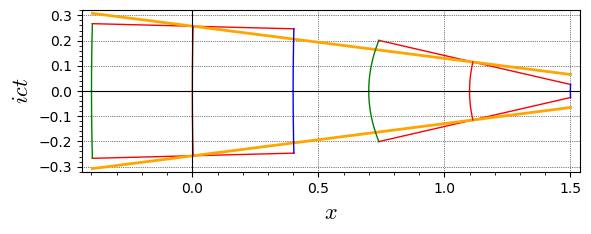

In [4]:
# Пример использования:
# accelerations
A1 = 0.1
A2 = 2

#half-length of the charges
L = 0.4

# distance between centers of the charges
D = 1.1

# time duration of the tube
T1 = 0.25
T2 = 0.115

# time when velocity of charge is zero
T1_0 = 0
T2_0 = -0

tune_T1 = True
# Режим 'simple' — как было
p = tubes_plot_simple(A1, A2, L, D, T1, T2, tune_T1 = tune_T1, mode='simple')


p.show(aspect_ratio=1, axes_labels=['$x$', '$ict$'], gridlines=True, frame=True, figsize=6)

In [5]:
@interact
def _(A1=slider(srange(0,10,.1),default = 0.1),
      A2=slider(srange(0,10,.1),default = 2),
      T1=slider(srange(.005,1,.005),default = 0.25),
      T2=slider(srange(.005,1,.005),default = 0.1),
      D=slider(srange(.01,10,.01),default = 2*L + 0.5)):
    tubes_plot_simple(A1, A2, L, D, T1, T2, tune_T1 = True, mode='simple', logging=False).show(aspect_ratio=1)

Interactive function <function _ at 0x7f0963cea4d0> with 5 widgets
  A1: SelectionSlider(description='A1', ind…

нужно один из time duration of the tube зафиксировать, а второй варьировать. 

Давай вспомним статью Ферми, в этой статье фиксировалось dt_0. Пусть даже не численно, но аналитически. Это значение фиксировалось dt_0 исходя из того где мы выбирали точку О. И я хочу теперь такой же алгоритм. Мы выбираем точку О где хотим. А именно мы ее можем выбрать в любой точке толщины первого заряда или в любой точке толщины второго заряда. Исходя из этого и из заданного значения dt_0 мы должны теперь найти time duration of the tube
T1 и T2 в области центральной мировой линии

И далее нам нужно искать аналог уравнения 
$$ - dt_0\left\{
\delta x \int \left (1 + \frac{\vec {Г} \cdot \overrightarrow{\left(P - O\right)}}{c^2}\right)\, E_x de
+
\delta y \int \left (1 + \frac{\vec {Г} \cdot \overrightarrow{\left(P - O\right)}}{c^2}\right)\, E_y de
+ \\ +
\delta z \int \left (1 + \frac{\vec {Г} \cdot \overrightarrow{\left(P - O\right)}}{c^2}\right)\, E_z de
\right\}.$$

Из работы Ферми, но теперь уже для двух несинхронно ускоряющихся зарядов в следующем виде

$$
\delta S = -\delta t_0 \left\{
\delta x_1 \int_{V_1} \frac{dt}{dt_0}(\vec {Г}_1, \vec {Г}_2, \overrightarrow{\left(P - O\right)})\, E_x \rho_1 dV_1
+
\delta x_2 \int_{V_2} \frac{dt}{dt_0}(\vec {Г}_1, \vec {Г}_2, \overrightarrow{\left(P - O\right)})\, E_x \rho_2 dV_2
\right\} + \dots
$$

Здесь поправка Ферми без полусуммы $dt = \frac{dt}{dt_0}(\vec {Г}_1, \vec {Г}_2, \overrightarrow{\left(P - O\right)})\,dt_0$ есть функция зависимости дифференциала dt в интеграле действия для вариации В для несинхронно ускоряющихся зарядов, найденная из принципа минимизации поверхностной энергии гиперповерхности пределов интегрирования в интеграле действия. И заметь эта функция зависит как от выбора точки О так и от расстояния между зарядами так же и от обоих ускорений

Это выражение должно обращаться в нуль для всех значений $\delta х_1, \delta x_2$, и поэтому из него получаются три соотношения, которые сводятся к единственному векторному

$$\int \frac{dt}{dt_0}(\vec {Г}_1, \vec {Г}_2, \overrightarrow{\left(P - O\right)})\, \vec E de = 0.\,\,\,(3)$$

Таким образом уравнение движения каждого их несинхронно ускоряющихся зарядов зависит от ускорения каждого из зарядов. Обрати на это особое внимание.

И задача теперь найти точный или приближённый вид такой поправки Ферми, содержащий оба ускорения

Для начала, мы не переходим в локальную систему какого либо из зарядов, мы работаем в лабораторной системе
Далее,  вот посмотри на рисунок, это я на одном графике нарисовал границу интегрирования в режимах exponental и perp, как видишь, разница есть, но она небольшая. Преимущество экспоеннциального режима, он выглядит красивее и кажется точнее, но мы вынуждены были использовать численный find_root, в режиме же perp все вычисления происходят аналитически. И хотя погрешность этого метода больше, но возможность получения аналитической формулы для обобщённой (для двух зарядов) поправки Ферми меня подкупает.

мне сейчас нужно чтобы ты попытался на основании этого рещима получить аналитическое выражение для обобщённой поправки Ферми


In [6]:
from scipy.optimize import fsolve

def equations(vars):
    T1, T2 = vars
    # Вычисляем x_R1, x_L2, t_R1, t_L2
    x_R1 = 0.5 * A1 * T1**2 + L
    x_L2 = D + 0.5 * A2 * T2**2 - L
    t_R1 = T1_0 + T1
    t_L2 = T2_0 + T2

    # Условие: k = A1 и k = A2 — но они разные, поэтому минимизируем разницу
    k = (1/(x_L2 - x_R1)) * log(t_L2 / t_R1)
    error1 = k - A1
    error2 = k - A2
    return [error1, error2]


In [7]:
from math import log

def equations(vars):
    T1, T2 = vars
    # Вычисляем x_R1, x_L2, t_R1, t_L2
    x_R1 = 0.5 * A1 * T1**2 + L
    x_L2 = D + 0.5 * A2 * T2**2 - L
    t_R1 = T1_0 + T1
    t_L2 = T2_0 + T2

    # Условие: k = A1 и k = A2 — но они разные, поэтому минимизируем разницу
    if x_L2 <= x_R1:
        return [1e6, 1e6]  # большая ошибка, чтобы fsolve не выбрал это решение
    if t_R1 <= 0 or t_L2 <= 0:
        return [1e6, 1e6]

    try:
        k = (1/(x_L2 - x_R1)) * log(t_L2 / t_R1)
    except ValueError:
        return [1e6, 1e6]

    # Производная экспоненты в точке x_R1: t'(x_R1) = -k t_R1
    # Производная границы в точке x_R1: t_1'(x_R1) = 1/(A1 t_R1)
    # Условие перпендикулярности: t'(x_R1) = -A1 t_R1
    error1 = -k * t_R1 + A1 * t_R1

    # Аналогично для второй точки
    error2 = -k * t_L2 + A2 * t_L2

    return [error1, error2]

In [8]:
s = 100
for i in range(1,13):
    s *= 1.1
    print (i, s)

1 110.000000000000
2 121.000000000000
3 133.100000000000
4 146.410000000000
5 161.051000000000
6 177.156100000000
7 194.871710000000
8 214.358881000000
9 235.794769100000
10 259.374246010000
11 285.311670611000
12 313.842837672100
